###  Dutch Restaurant reviews

Predict the score using the review texts from reviews scrapes already some time ago from the iens.nl website. 



In [27]:
# All reviews are in a zipped csv file, but this file was too big to share on github. 
# So I splitted the file into two chunks with the command line tool split. 
# These two parts, restaurantaa and restaurantab, need to be put together first.

!cat restauranta* > all_reviews.zip

In [28]:
### set up and initializing Holmes
import datatable as dt
import pandas as pd
import seaborn as sns
from langdetect import detect
sns.set(rc={'figure.figsize':(10,6)})

### I am using the fread function in datatable to import zipped CSV text file
iens = dt.fread('all_reviews.zip')
iens.shape

(211140, 9)

In [22]:
### show first 5 rows
iens.tail(5)

,reviewer,RestaurantNaam,Review,keuken,datum,eten,service,decor,ID
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,marian_groot,Het Ei Van Columbus,Heerlijk gegeten! Vooraf een heerlijke proeverij w…,FRANS,23/06/2013,8,9,8,211136
1,Kremers,Het Ei Van Columbus,Vanwege verjaardag van Oma uit eten. Keuzemenu bes…,FRANS,15/06/2013,8,8,7,211137
2,Mark-Gerards,Het Ei Van Columbus,Wij hebben hier met 6 personen gegeten en het is o…,FRANS,29/12/2012,10,10,1,211138
3,posth151,Het Ei Van Columbus,De bediening was zonder meer vriendelijk en gastvr…,FRANS,28/12/2012,7,8,6,211139
4,CulinairOegstgeest,Het Ei Van Columbus,Lekker gegeten in dit restaurant op mooie lokatie …,FRANS,09/11/2012,7,7,7,211140


In [6]:
### show one recap in full length
iens[3,2]

"Wat moet je hier nu weer mee?Goede cijfers op de Iens app, maar al schrijvende komt er weer een proest van humoristische verbazing boven. Dit is een leuke poging tot restaurant, met niet goed opgeleid personeel dat wel heel erg haar best doet en een maaltijd die ternauwernood volstaat voor de prijs.Matias zit aan een drukke straat met heel veel restaurantjes, de proppers staan voor de deur. Dit was onze 2e keus, maar we moesten te lang wachten bij onze 1e keus voor spareribs en cocktails. Toen wij aankwamen, na een hele leuke dag Rijksmuseum, zaten er uitsluitend toeristen binnen. De groep Amerikaanse jongeren waren over de korting aan het bakkeleien, waarmee blijkbaar geadverteerd werd buiten.Dit restaurantje is niet groot, een tafel op 10. Het personeel telde 6 tot 8 mensen, zo telde ik snel. Er was niet veel te doen, dus hingen ze een beetje rond. Wel heel vriendelijk overigens.De maaltijden zijn Mexicaans, met was Oosterse invloeden. Margarita's zijn goed, verhoudingsgewijs duur. 

#### Language detection

We focus on Dutch reviews only.

In [9]:
detect(iens[3,2])

'nl'

In [15]:
reviews = iens.to_pandas()

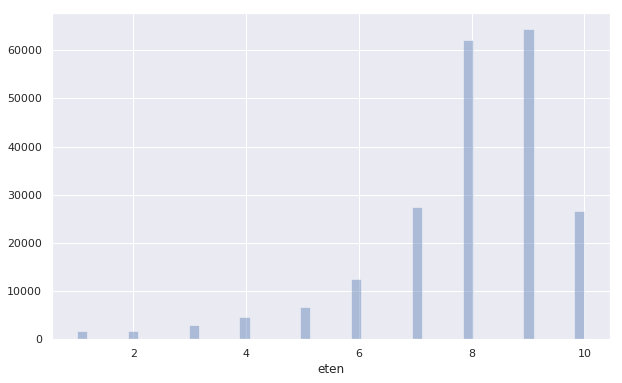

In [25]:
### Overview of the score given
sns.distplot(reviews.eten.dropna(), kde = False)